In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("online_shoppers_intention.csv")

# Quick look at the data
print(df.head())
print(df.info())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [2]:
print(df.columns)
print(df['Revenue'].value_counts())

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Revenue
False    10422
True      1908
Name: count, dtype: int64


In [3]:
features = ['Administrative', 'Informational', 'ProductRelated', 
            'BounceRates', 'ExitRates', 'PageValues']
X = df[features]   # Features
y = df['Revenue']  # Target

In [4]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9864, 6)
X_test shape: (2466, 6)
y_train shape: (9864,)
y_test shape: (2466,)


In [5]:
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
# Train the classifier
clf.fit(X_train, y_train)
# Check training accuracy
train_pred = clf.predict(X_train)
print("Training Accuracy:", (train_pred == y_train).mean())

Training Accuracy: 0.8967964314679643


In [6]:
# Predict on test set
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Test Accuracy:", accuracy_score(y_test, y_pred))
# Confusion matrix to see True/False positives/negatives
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Test Accuracy: 0.8791565287915653
Confusion Matrix:
 [[1943  112]
 [ 186  225]]


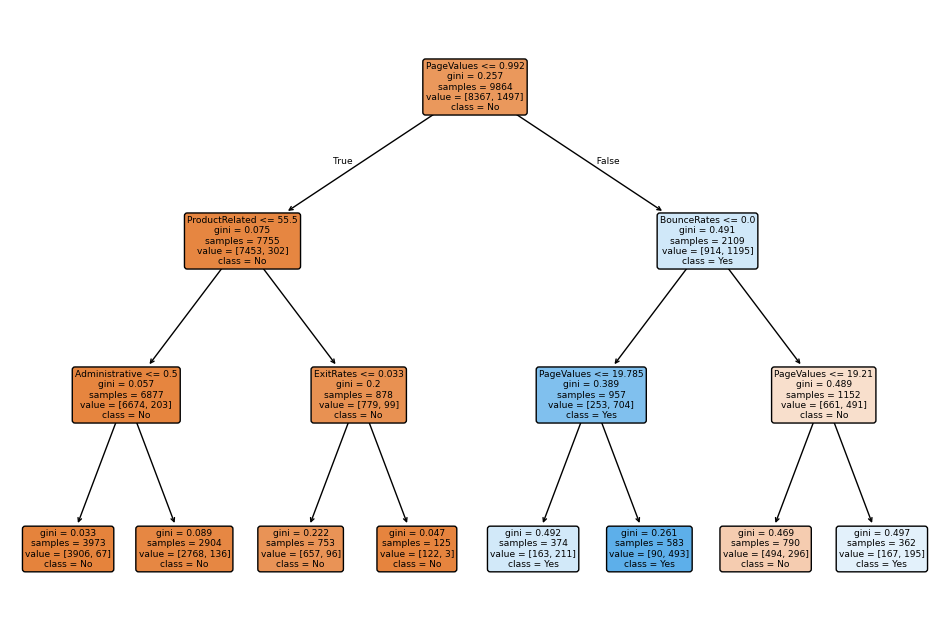

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size
plt.figure(figsize=(12,8))

# Plot the tree
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True)

plt.show()